# Data Visualization
```{tip}
A lot of these examples come from Cole Nussbaumer Knaflic's great book: 
Storytelling with Data: A Data Visualization Guide for Business Professionals
```

## Gestalt's Six Principles of Visual Perception 
Define how people interact with and create order out of visual stimuli. 

### Perceptual grouping
#### Proximity
We perceive objects that are physically close together as belonging to part of a group.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.rcParams['figure.figsize'] = (12, 4)
rng = np.random.default_rng(42)

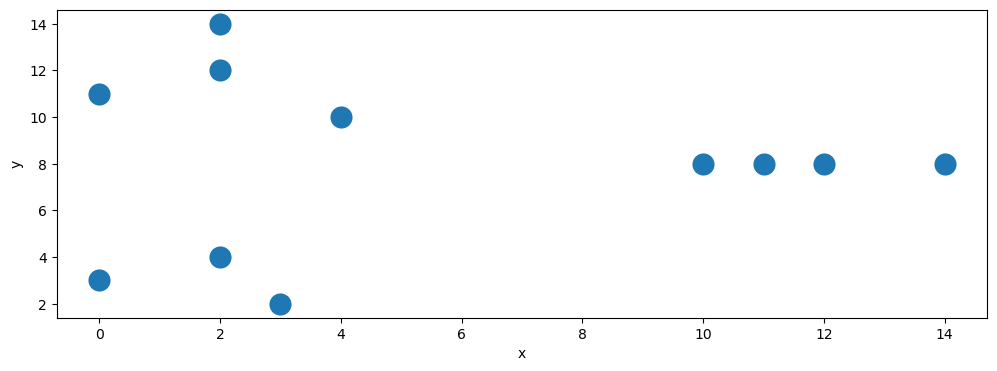

In [3]:
group_size = 4
group0 = rng.integers(low=0, high=5, size=(group_size,2))
group1 = rng.integers(low=[[10], [5]], high=[[15], [10]], size=(2, group_size)).T
group2 = rng.integers(low=[[0], [10]], high=[[5], [15]], size=(2, group_size)).T
df = pd.DataFrame(np.concatenate([group0, group1, group2]), columns=['x', 'y'])
df['group'] = df.index // group_size

sns.scatterplot(data=df, x='x', y='y', s=300)
plt.show()

### Similarity
Objects that are of similar color, shape, size, or orientation are perceived as related or belonging to part of a group.

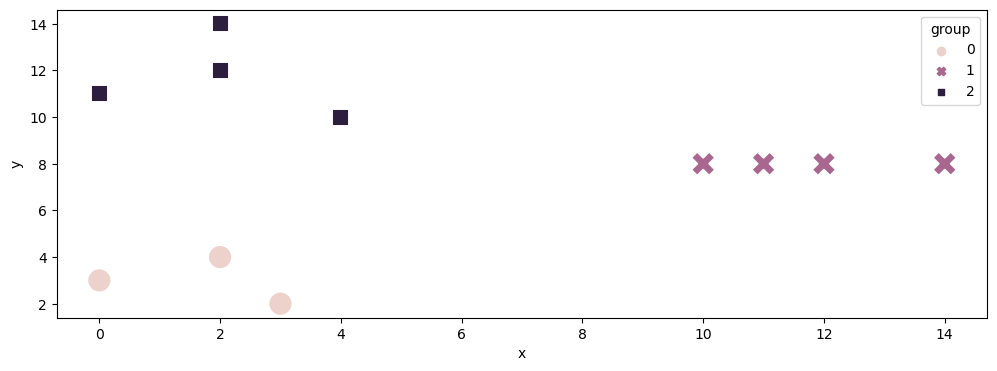

In [4]:
sns.scatterplot(data=df, x='x', y='y', hue="group", style="group", s=300)
plt.show()

### Enclosure
objects that are physically enclosed together as belonging to part of a group.

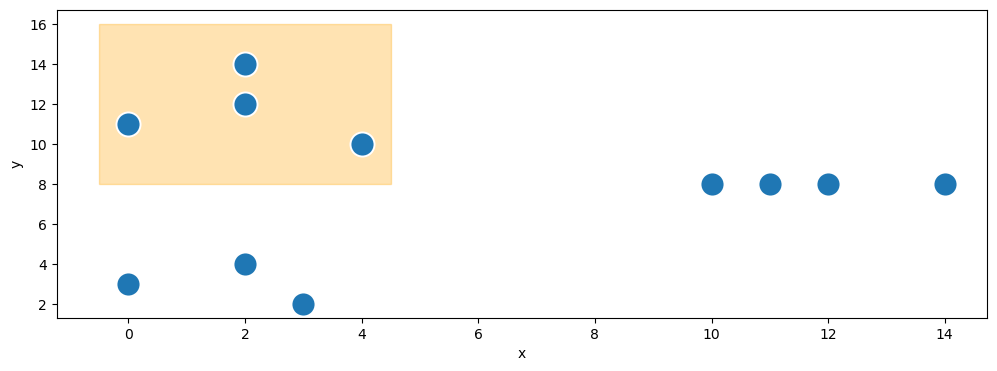

In [5]:
highlight = plt.Rectangle((-.5, 8), 5, 8, color='orange', alpha=0.3)
plt.gca().add_patch(highlight)

sns.scatterplot(data=df, x='x', y='y', s=300)
plt.show()

### Closure
People like things to be simple and to fit in the constructs that are already in our heads

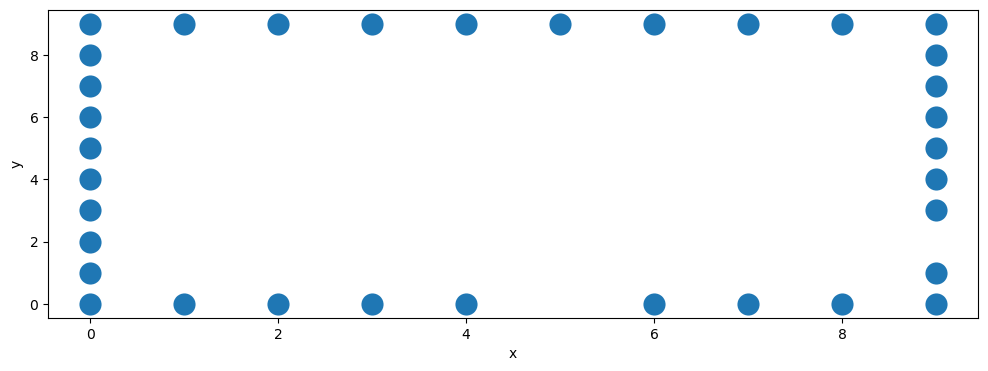

In [6]:
edge_points = 20
left = rng.integers(low=[[0], [0]], high=[[1], [10]], size=(2, edge_points)).T
right = rng.integers(low=[[9], [0]], high=[[10], [10]], size=(2, edge_points)).T
top = rng.integers(low=[[0], [9]], high=[[10], [10]], size=(2, edge_points)).T
bottom = rng.integers(low=[[0], [0]], high=[[10], [1]], size=(2, edge_points)).T
df = pd.DataFrame(np.concatenate([left, right, top, bottom]), columns=['x', 'y'])

sns.scatterplot(data=df, x='x', y='y', s=300)
plt.show()

### Continuity
Our eyes seek the smoothest path and naturally create continuity in what we see even where it may not explicitly exist

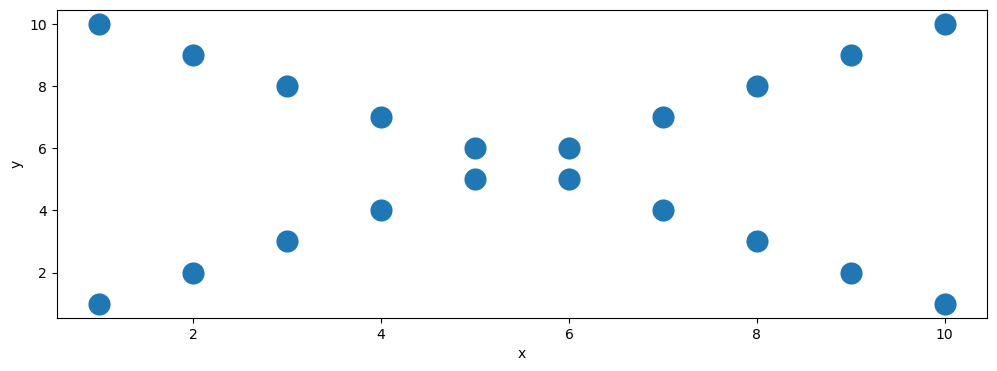

In [7]:
count = np.arange(10, 0, -1)
line0 = np.concatenate([count.reshape(1,-1), count.reshape(1,-1)]).T
line1 = np.concatenate([count.reshape(1,-1), np.sort(count, axis=0).reshape(1,-1)]).T
df = pd.DataFrame(np.concatenate([line0, line1]), columns=['x', 'y'])

sns.scatterplot(data=df, x='x', y='y', s=300)
plt.show()

### Connection
objects that are physically connected are thought of as part of a group

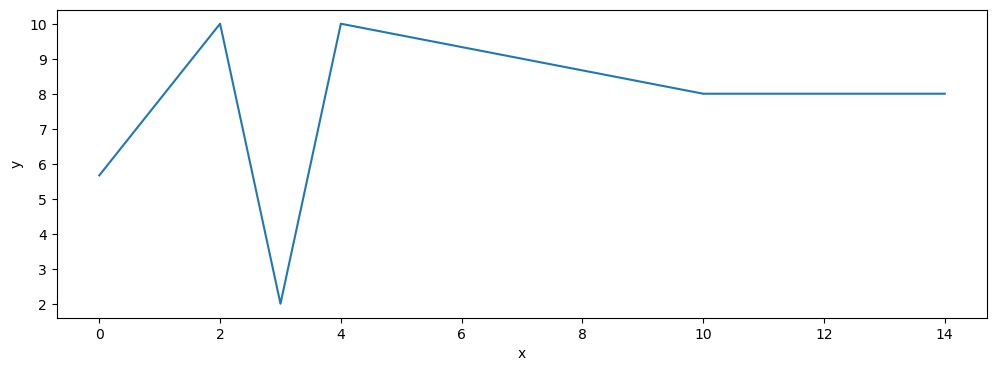

In [19]:
df = pd.DataFrame(np.concatenate([group0, group1, group2]), columns=['x', 'y'])
df['group'] = df.index // group_size
sns.lineplot(data=df, x='x', y='y', markers=True, dashes=False, errorbar=None)
plt.show()

## Plot examples

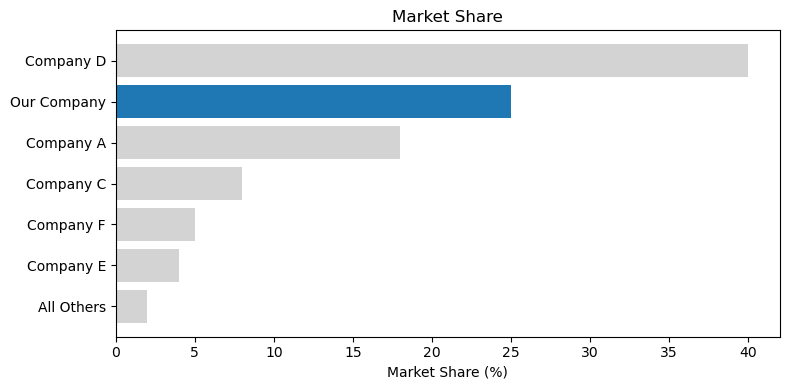

In [9]:
companies = ['Company D', 'Our Company', 'Company A', 'Company C', 'Company F', 'Company E', 'All Others']
market_share = [40, 25, 18, 8, 5, 4, 2]
colors = ['lightgray', 'tab:blue', 'lightgray', 'lightgray', 'lightgray', 'lightgray', 'lightgray']

plt.figure(figsize=(8, 4))
plt.barh(companies, market_share, color=colors)
plt.xlabel('Market Share (%)')
plt.title('Market Share')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

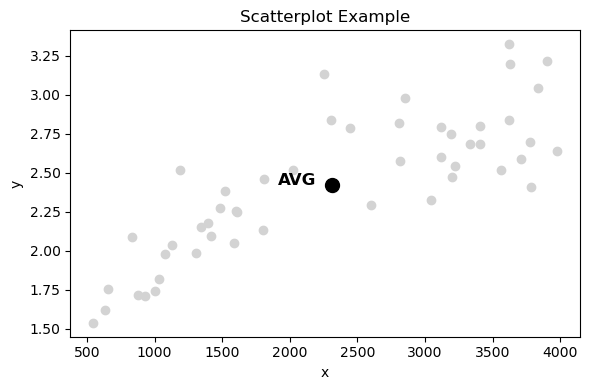

In [18]:
miles_driven = rng.uniform(500, 4000, 50)  # random values between 500 and 4000
cost_per_mile = 3 - 2 * np.exp(-miles_driven / 1500) + rng.normal(0, 0.2, 50)  # simulated trend with noise


plt.figure(figsize=(6, 4))
plt.scatter(miles_driven, cost_per_mile, color='lightgray', label='Data')

# Highlight the average point
avg_miles = np.mean(miles_driven)
avg_cost = np.mean(cost_per_mile)
plt.scatter(avg_miles, avg_cost, color='black', s=100, label='Average')
plt.text(avg_miles - 400, avg_cost, 'AVG', color='black', fontsize=12, weight='bold')

plt.title('Scatterplot Example')
plt.xlabel('x')
plt.ylabel('y')
# plt.xlim(0, 4000)
# plt.ylim(0, 3)
plt.tight_layout()
plt.show()

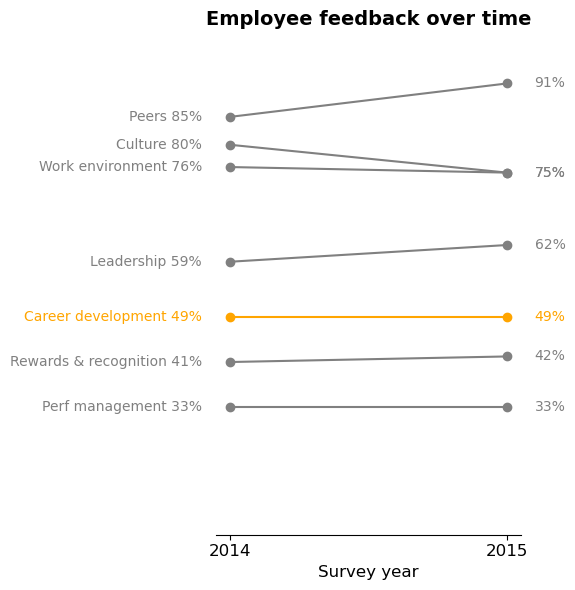

In [11]:
categories = ['Peers', 'Culture', 'Work environment', 'Leadership', 'Career development', 'Rewards & recognition', 'Perf management']
year_2014 = [85, 80, 76, 59, 49, 41, 33]
year_2015 = [91, 75, 75, 62, 49, 42, 33]
colors = ['gray', 'gray', 'gray', 'gray', 'orange', 'gray', 'gray']

fig, ax = plt.subplots(figsize=(6, 6))

for i, category in enumerate(categories):
    ax.plot([2014, 2015], [year_2014[i], year_2015[i]], marker='o', color=colors[i])
    ax.text(2013.9, year_2014[i], f'{category} {year_2014[i]}%', va='center', ha='right', color=colors[i])
    ax.text(2015.1, year_2015[i], f'{year_2015[i]}%', va='center', color=colors[i])

plt.title('Employee feedback over time', fontsize=14, weight='bold')
plt.xticks([2014, 2015], ['2014', '2015'], fontsize=12)
plt.ylim(10, 100)
ax.set_xlabel('Survey year', fontsize=12)
ax.set_ylabel('Percent favorable', fontsize=12)

# Hide the y-axis and spines for cleaner look
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

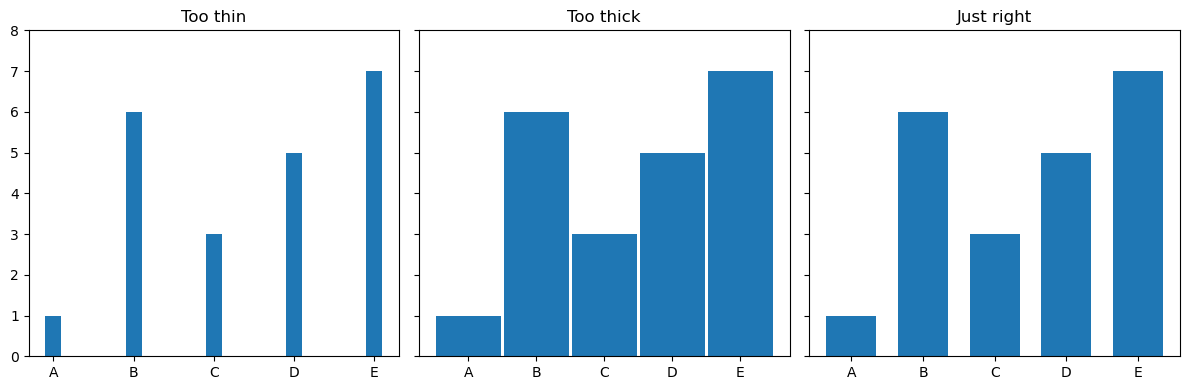

In [17]:
categories = ['A', 'B', 'C', 'D', 'E']
values = [1, 6, 3, 5, 7]

fig, axs = plt.subplots(1, 3, sharey=True)

axs[0].bar(categories, values, width=0.2)
axs[0].set_title('Too thin')
axs[0].set_ylim(0, 8)
axs[1].bar(categories, values, width=0.95)
axs[1].set_title('Too thick')
axs[2].bar(categories, values, width=0.7)
axs[2].set_title('Just right')

# Set common y-axis label
for ax in axs:
    ax.set_ylim(0, 8)

plt.tight_layout()
plt.show()

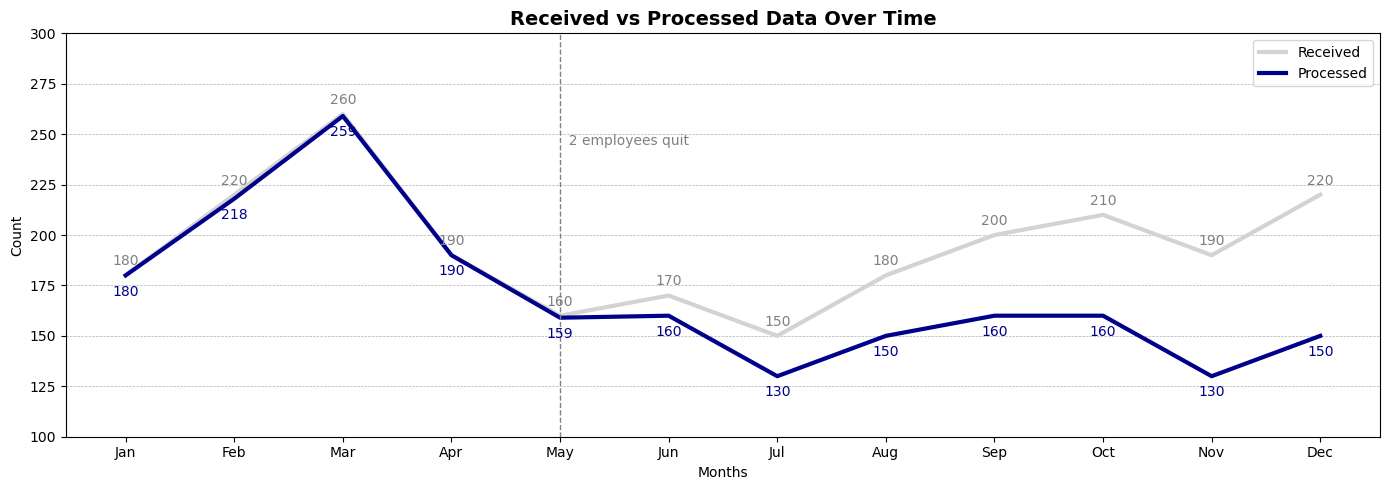

In [13]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
received = [180, 220, 260, 190, 160, 170, 150, 180, 200, 210, 190, 220]
processed = [v-(10*(i-4)) if i > 4 else v+rng.integers(low=-2, high=2) for i, v in enumerate(received)]

plt.figure(figsize=(14, 5))

# Plot received data in gray and processed data in blue
plt.plot(months, received, color='lightgray', linewidth=3, label='Received')
plt.plot(months, processed, color='darkblue', linewidth=3, label='Processed')

# Annotate values on the plot
for i, (r, p) in enumerate(zip(received, processed)):
    plt.text(months[i], r + 5, str(r), color='gray', fontsize=10, ha='center')
    plt.text(months[i], p - 10, str(p), color='darkblue', fontsize=10, ha='center')


# Add title and labels
plt.title('Received vs Processed Data Over Time', fontsize=14, weight='bold')
plt.xlabel('Months')
plt.ylabel('Count')

plt.axvline(x='May', color='gray', linestyle='--', linewidth=1)
plt.text('May', 250, '  2 employees quit',
         color='gray', fontsize=10, va='top', ha='left')

plt.legend(loc='upper right')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.ylim(100, 300)
plt.tight_layout()
plt.show()
